In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt



In [9]:
data= pd.read_csv("new_listingsData.csv")
data



,Unnamed: 0,price,host_location,host_since
0,0,445.55,"Westport, Ireland",2009-10-02
1,1,141.55,"Dublin, Ireland",2009-11-29
2,2,85.50,"County Clare, Ireland",2010-07-06
3,3,128.25,"Galway, Ireland",2010-07-19
4,4,79.80,Ireland,2010-07-27
...,...,...,...,...
20404,28487,38.00,"Louth, Ireland",2016-06-02
20405,28488,196.65,"Dublin, Ireland",2023-09-04
20406,28489,1064.00,"Leitrim Village, Ireland",2023-04-29
20407,28491,416.10,"Blackrock, Ireland",2017-07-25


In [4]:
df = pd.DataFrame(data)

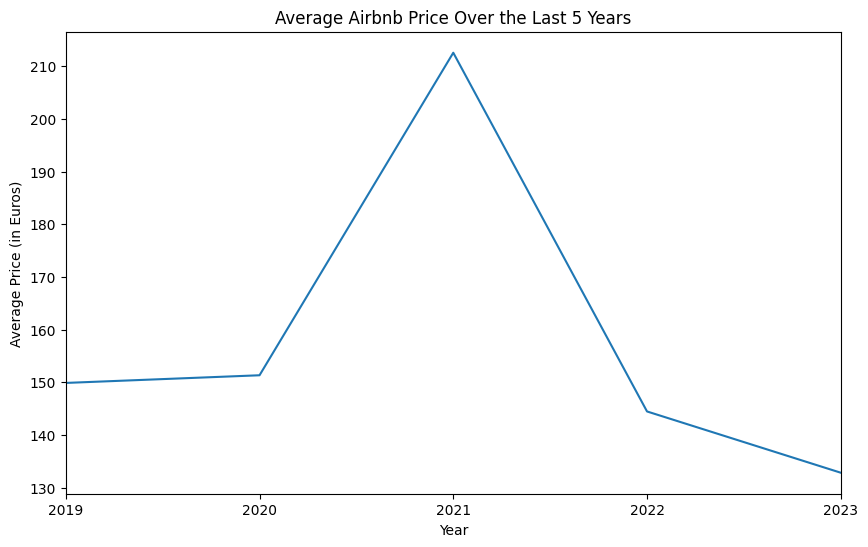

In [5]:
# Convert 'host_since' to a datetime format and set it as the index
df['host_since'] = pd.to_datetime(df['host_since'])
df.set_index('host_since', inplace=True)

# Group by year and calculate the average price for each year
yearly_avg_price = df['price'].resample('Y').mean()

# Filter the last 5 years
last_5_years = yearly_avg_price[-5:]

# line chart to visualize the price trend
plt.figure(figsize=(10, 6))
last_5_years.plot(kind='line')
plt.title('Average Airbnb Price Over the Last 5 Years')
plt.xlabel('Year')
plt.ylabel('Average Price (in Euros)')

# Show the chart
plt.show()

In [14]:
rentals = pd.read_csv("new_RentalListingsData.csv")
rentals 

,Unnamed: 0,Property Type,Location,VALUE,Year
0,0,All property types,Carlow,748.33,2008
1,1,All property types,Carlow Town,807.53,2008
2,2,All property types,"Graiguecullen, Carlow",711.35,2008
3,3,All property types,"Tullow, Carlow",719.98,2008
4,4,All property types,Cavan,571.63,2008
...,...,...,...,...,...
99811,280326,Apartment,Galway,1887.35,2022
99812,280327,Apartment,Galway City,1987.55,2022
99813,280394,Apartment,Limerick,1417.78,2022
99814,280395,Apartment,Limerick City,1473.68,2022


In [15]:
rentdf = pd.DataFrame(rentals)

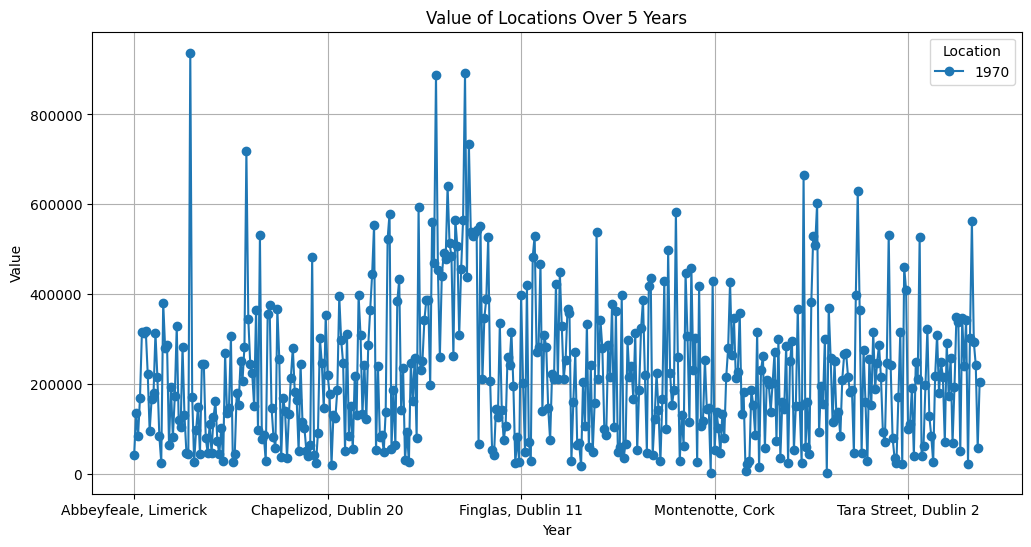

In [19]:
# Convert 'Year' column to datetime if it's not already
rentdf['Year'] = pd.to_datetime(rentdf['Year'])

# Group the data by 'Location' and calculate the sum of 'VALUE' for each 'Location'
grouped = rentdf.groupby(['Location', rentdf['Year'].dt.year])['VALUE'].sum().unstack()

# Plot the data for each location
grouped.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Value of Locations Over 5 Years')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='Location')
plt.grid(True)
plt.show()